In [27]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import RNNTrainer,GRURegressor

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


'd:\\pg\\air'

In [7]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
window_size=10
num_features=9
downsample_step=50 # 0.003 * downsample_step = шаг данных в секундах
target_window_size = 1 # output size количество выходных данных для 1 примера
# Подготовка данных
X, y, df = PD.many_to_many(
    window_size=window_size,
    num_features=num_features,
    downsample_step=downsample_step,
    target_window_size=target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([14407, 10, 9]),
 torch.Size([7097, 10, 9]),
 torch.Size([14407, 1]),
 torch.Size([7097, 1]))

In [8]:
model = GRURegressor( 
    input_size = X_train.shape[2],
    hidden_size=64, 
    output_size=y_train.shape[1], 
    num_layers=1,
    device = device)

trainer = RNNTrainer(
    model=model,
    learning_rate=0.001,
    device= device
)


In [9]:
#возможность загрузитиь параметры в модель
# model.load_state_dict(torch.load('up_tree_weight.pth'))
# model = model.to(device)
#возможность сохранить параметры модели
#torch.save(model.state_dict(), 'Quantum_weight3.pth')

In [10]:

history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=64,
    epochs=200,
    loss_tube=5
)

Epoch 1
Main: 2.526720, MAPE: 0.974117
Test - MAPE: 0.954672, Tube: 0.000000
Epoch 2
Main: 2.445212, MAPE: 0.934746
Test - MAPE: 0.915544, Tube: 0.000000
Epoch 3
Main: 2.368851, MAPE: 0.895138
Test - MAPE: 0.876417, Tube: 0.000000
Epoch 4
Main: 2.292547, MAPE: 0.855932
Test - MAPE: 0.837290, Tube: 0.000000
Epoch 5
Main: 2.216360, MAPE: 0.816269
Test - MAPE: 0.798202, Tube: 0.001691
Epoch 6
Main: 2.138467, MAPE: 0.777482
Test - MAPE: 0.760595, Tube: 0.004932
Epoch 7
Main: 2.067877, MAPE: 0.741518
Test - MAPE: 0.726278, Tube: 0.006341
Epoch 8
Main: 1.994665, MAPE: 0.708523
Test - MAPE: 0.694904, Tube: 0.010568
Epoch 9
Main: 1.922848, MAPE: 0.678446
Test - MAPE: 0.666498, Tube: 0.010427
Epoch 10
Main: 1.855973, MAPE: 0.651551
Test - MAPE: 0.640753, Tube: 0.012963
Epoch 11
Main: 1.818668, MAPE: 0.637432
Test - MAPE: 0.638311, Tube: 0.013104
Epoch 12
Main: 1.815475, MAPE: 0.635420
Test - MAPE: 0.635873, Tube: 0.012822
Epoch 13
Main: 1.804186, MAPE: 0.631999
Test - MAPE: 0.633442, Tube: 0.01

In [11]:
model.load_state_dict(torch.load('best_model_weights.pth'))

FileNotFoundError: [Errno 2] No such file or directory: 'best_model_weights.pth'

In [12]:
LV = LossVisualizer(history)

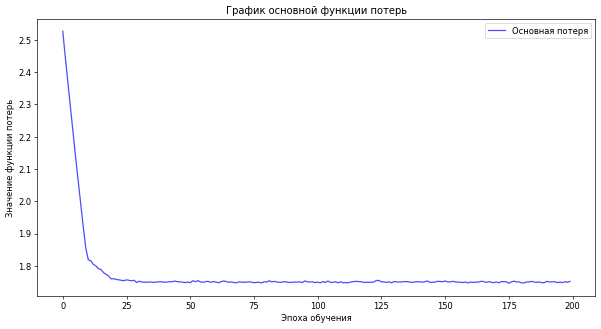

In [13]:
LV.show_training_loss()

In [14]:
a = "AAdAdd"
a.lower()

'aadadd'

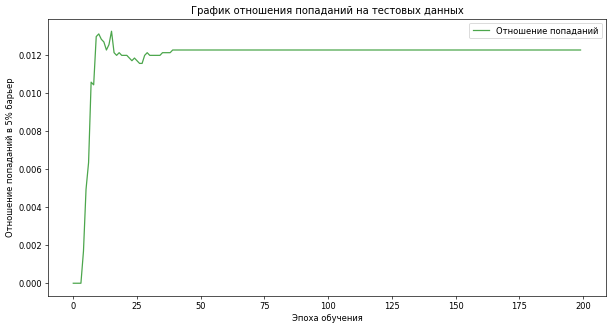

In [15]:
LV.show_test_tube()

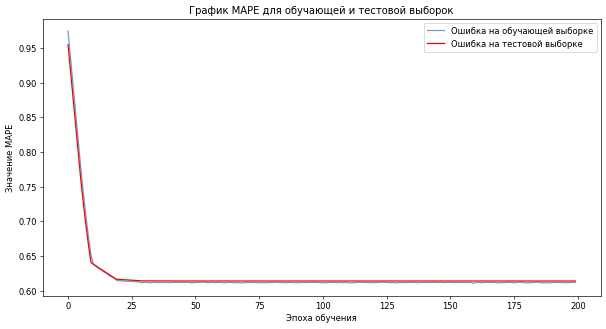

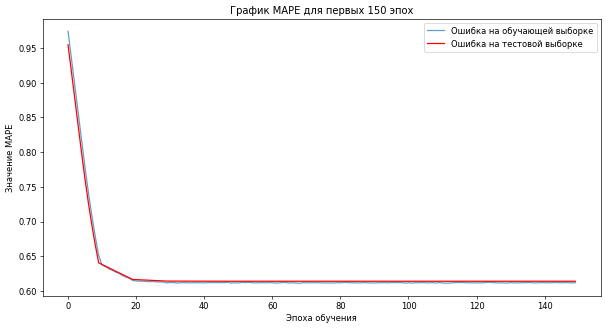

In [16]:
LV.show_mape()

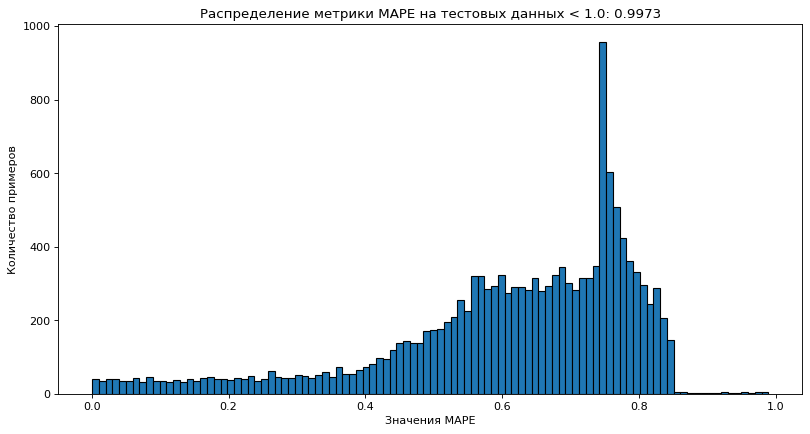

Процент значений MAPE < 1.0: 0.9973


In [18]:
LV.histogram_mape(model,X_train,y_train,limit_percel = 5)

In [19]:
LV.show_predictions_rnn(model,df,device)

TypeError: LossVisualizer.show_predictions_rnn() missing 1 required positional argument: 'device'